# Supervised Learning
The idea of this notebook is using different learning machines in order to see how good are timbral features to describe musical genres. 
The data used is extracted from the GTZAN dataset: mfcc using gaussian windows with 60% overlapping. The features are the mean of the mfcc and the flattened covariance matrix for a total of 250 features

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from numpy import interp
from sklearn import preprocessing,manifold
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, auc

In [2]:
# Reading the data
data = pd.read_csv("mfccToy.csv",header=None)
data = pd.DataFrame(data).to_numpy()
data.shape

(300, 211)

Data preprocessing: Cleaning NaN and Normalizing without imposing a distribution

In [3]:
data = data[~np.isnan(data).any(axis=1)]
data.shape

target = data[:,-1]
X = data[:,:-1]
X_norm = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [4]:
# This function plots the 2 dimensional data with the target colors
def plotgenres(Xe,target,pred,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.title.set_text('Real')
    ax2.title.set_text('Predicted')
    ax1.scatter(Xe[target==1,0],Xe[target==1,1],c="c",label="classical")
    ax1.scatter(Xe[target==2,0],Xe[target==2,1],c="black",label="metal")
    ax1.scatter(Xe[target==3,0],Xe[target==3,1],c="lightgreen",label="reggae")
    ax2.scatter(Xe[pred==1,0],Xe[pred==1,1],c="c",label="classical")
    ax2.scatter(Xe[pred==2,0],Xe[pred==2,1],c="black",label="metal")
    ax2.scatter(Xe[pred==3,0],Xe[pred==3,1],c="lightgreen",label="reggae")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')
    fig.suptitle(title)
    plt.show()

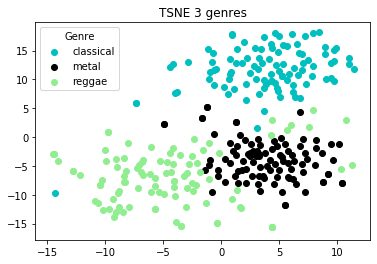

In [5]:
Xe= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_norm)
fig,ax=plt.subplots()
ax.scatter(Xe[target==1,0],Xe[target==1,1],c="c",label="classical")
ax.scatter(Xe[target==2,0],Xe[target==2,1],c="black",label="metal")
ax.scatter(Xe[target==3,0],Xe[target==3,1],c="lightgreen",label="reggae")
plt.legend(loc='upper left',title="Genre")
plt.title('TSNE 3 genres')
plt.show()

In [6]:
# Splitting the data into train/test/validation
X_train, X_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [7]:
# Applying the dimensionality reduction via Barnes-Hut tsne
Xe_test= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_test)

## Classifiers

### Logistic Regression

In [8]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001
Error: 5.000000000000004 %


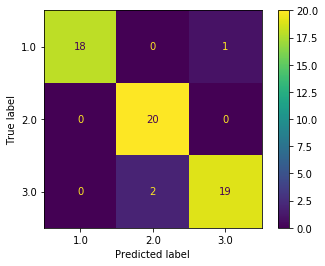

In [9]:
pred = logistic.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])
plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
print("Error:",(1-err)*100,"%")

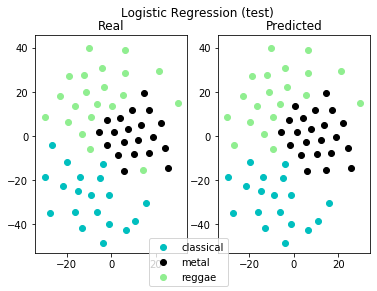

In [10]:
plotgenres(Xe_test,y_test,pred,"Logistic Regression (test)")

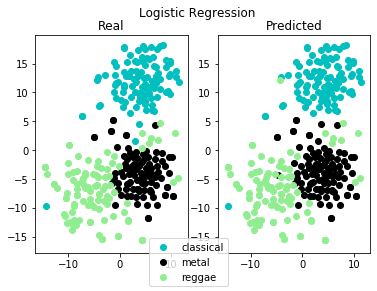

In [12]:
pred = logistic.predict(X_norm)
plotgenres(Xe,target,pred,"Logistic Regression")

## Decision Tree

In [13]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

Precision: 0.8666666666666667
Recall: 0.8666666666666667
F1 Score: 0.8666666666666667
Error: 13.33333333333333 %


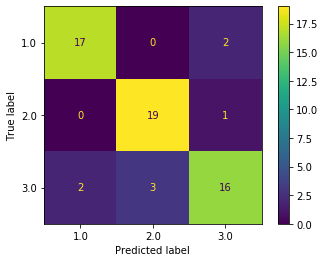

In [14]:
pred = clf.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])
plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
print("Error:",(1-err)*100,"%")

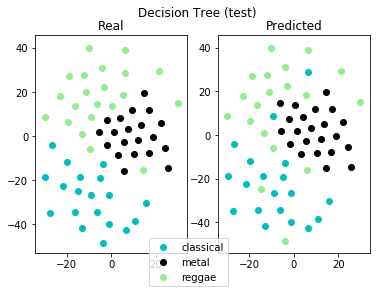

In [15]:
plotgenres(Xe_test,y_test,pred,"Decision Tree (test)")

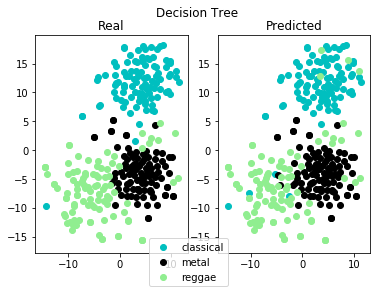

In [16]:
pred = clf.predict(X_norm)
plotgenres(Xe,target,pred,"Decision Tree")

## Support vector machine

Kernels:
* Lineal
* Polynomial
* Radial base

Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001


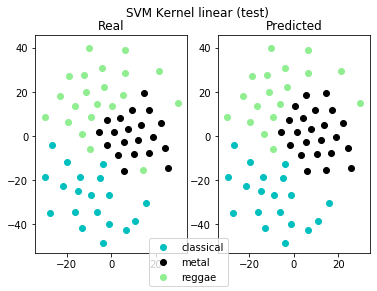

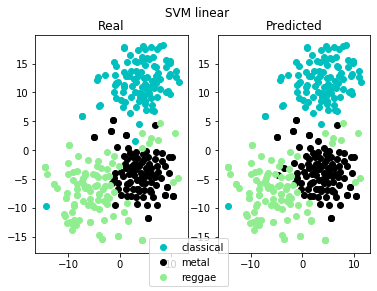

In [17]:
parameters = {'C':[0.1,0.01,1,10]}
linear_kernel_svm_clf = svm.SVC(kernel = "linear")
clf = GridSearchCV(linear_kernel_svm_clf, parameters)
clf.fit(X_train, y_train)


pred = clf.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])
plotgenres(Xe_test,y_test,pred,"SVM Kernel linear (test)")


pred = clf.predict(X_norm)
plotgenres(Xe,target,pred,"SVM linear")

{'C': 1}
Accuracy: 0.9466666666666667
Error: 5.000000000000004 %


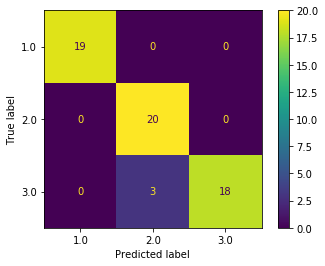

In [18]:
print(clf.best_params_)
cross_scores = cross_val_score(clf, X_norm, target, cv=10)
print("Accuracy:" ,cross_scores.mean())
plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
print("Error:",(1-err)*100,"%")

Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001


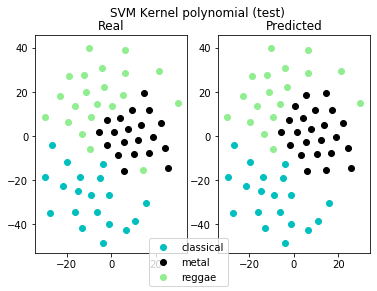

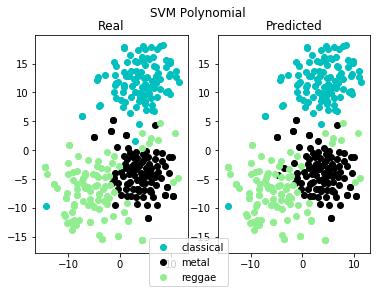

In [19]:
parameters = {'degree':[2,3,4,5,6,7,8,9,10], 'C':[0.1,0.01,1,10]}
poly_kernel_svm_clf = svm.SVC(kernel = "poly")
clf = GridSearchCV(poly_kernel_svm_clf, parameters)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])
plotgenres(Xe_test,y_test,pred,"SVM Kernel polynomial (test)")

pred = clf.predict(X_norm)
plotgenres(Xe,target,pred,"SVM Polynomial")

{'C': 0.01, 'degree': 4}
Accuracy: 0.96
Error: 5.000000000000004 %


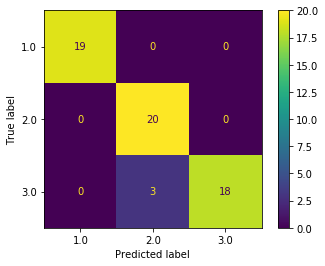

In [20]:
print(clf.best_params_)
cross_scores = cross_val_score(clf, X_norm, target, cv=10)
print("Accuracy:" ,cross_scores.mean())
plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
print("Error:",(1-err)*100,"%")

Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001


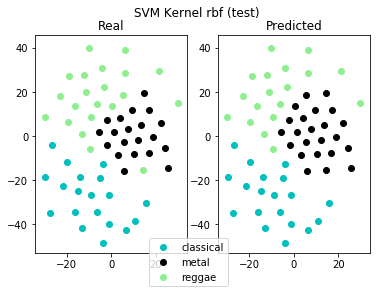

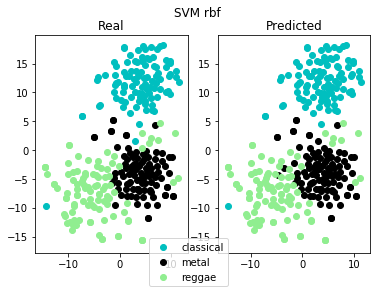

In [21]:
parameters = {'gamma':[0.001,0.01,0.1,1,10], 'C':[0.1,0.01,1,10]}
rbf_kernel_svm_clf = svm.SVC(kernel = "rbf",gamma=30,C=10)
clf = GridSearchCV(rbf_kernel_svm_clf, parameters)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])
plotgenres(Xe_test,y_test,pred,"SVM Kernel rbf (test)")

pred = clf.predict(X_norm)
plotgenres(Xe,target,pred,"SVM rbf")

{'C': 10, 'gamma': 0.1}
Accuracy: 0.9666666666666666
Error: 5.000000000000004 %


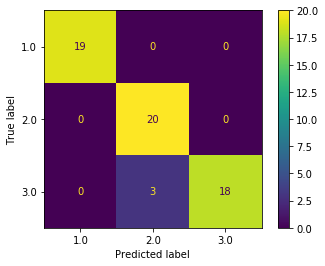

In [22]:
print(clf.best_params_)
cross_scores = cross_val_score(clf, X_norm, target, cv=10)
print("Accuracy:" ,cross_scores.mean())
plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
print("Error:",(1-err)*100,"%")

## Multilayer Perceptron

* Hidden layers: $L = 1,...,5$
* Number of neurons in the hidden layers: $l_i = 1,..,100$
* Learning rate: 0.002,0.005,0.009,0.008

In [26]:
learning_rate, activation = 0.2, 'relu'
error = 0
# Choose best performance with combinations of activations and learning rate
for act in ['relu','tanh','logistic']:
    for lr in [0.002,0.005,0.009,0.008]:
        nn =  MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),activation=act, learning_rate_init=lr)
        nn.fit(X_train,y_train)
        err = np.sum(nn.predict(X_val) == y_val)/len(y_val)
        print(act,lr,err)
        if(err > error):
            learning_rate, activation, error = lr,act,err
nn =  MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),activation=activation, learning_rate_init=learning_rate)
nn.fit(X_train,y_train)

relu 0.002 0.9375
relu 0.005 0.9583333333333334
relu 0.009 0.9375
relu 0.008 0.9583333333333334
tanh 0.002 0.9375
tanh 0.005 0.9583333333333334
tanh 0.009 0.3125
tanh 0.008 0.3541666666666667
logistic 0.002 0.9166666666666666
logistic 0.005 0.9791666666666666
logistic 0.009 0.3125
logistic 0.008 0.3333333333333333


MLPClassifier(activation='logistic',
              hidden_layer_sizes=(100, 100, 100, 100, 100),
              learning_rate_init=0.005)

Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001
Error: 5.000000000000004 %


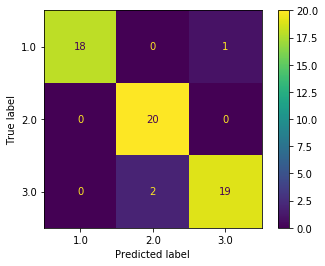

In [27]:
pred = nn.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])
plot_confusion_matrix(nn,X_test,y_test)
err = np.sum(nn.predict(X_test) == y_test)/len(y_test)
print("Error:",(1-err)*100,"%")

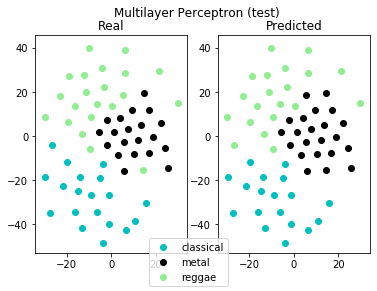

In [28]:
plotgenres(Xe_test,y_test,pred,"Multilayer Perceptron (test)")

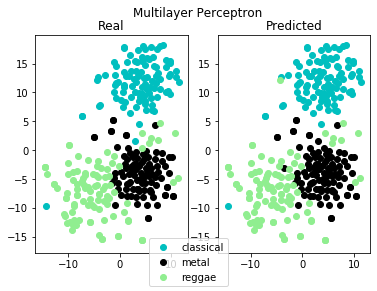

0.0024073295396988483


In [29]:
pred = nn.predict(X_norm)
plotgenres(Xe,target,pred,"Multilayer Perceptron")
print(nn.loss_)

| Parámetro | Logistic  Regression | Decision Tree | SVM Linear | SVM rbf | SVM Poly | Multilayer Perceptron |
|:---------:|:--------------------:|:-------------:|:----------:|:-------:|:--------:|:---------------------:|
| Precision |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |
|   Recall  |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |
|     F1    |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |

In [12]:
import tensorflow as tf
from tensorflow import keras
print(X_train.shape[1])

210


In [13]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=X_train.shape),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(3, activation="softmax")
])

In [14]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 40320)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               12096300  
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 303       
Total params: 12,126,703
Trainable params: 12,126,703
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))


Epoch 1/30


ValueError: in user code:

    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\isaur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 40320 but received input with shape [32, 210]
